# CUSTOMER SATISFACTION ANALYSIS - FACTOR ANALYSIS

## Team 7

Members:

[Hernández Torres Luis Enrique] ([A01662166])

[Víctor Ángel Martínez Vidaurri] ([A01665456])

[Alejandro Martínez Ochoa] ([A01657661])



## Setup

In [8]:

# === Librerías ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Configuración general
sns.set(style="whitegrid", palette="deep")
pd.set_option("display.max_columns", None)


## Parte 1 – Exploración y adecuación de los datos (25 pts)

**Preguntas a responder:**
- ¿Qué observas en la estructura y los patrones del conjunto de datos?  
- ¿Existen valores faltantes o atípicos que deban considerarse antes del análisis factorial?  
- ¿El conjunto de datos es estadísticamente adecuado para aplicar un análisis factorial?


### 1.1 Exploración básica de datos (10 pts)

**Tareas:**
- Cargar y examinar la estructura del conjunto de datos.  
- Calcular estadísticas descriptivas básicas.  
- Crear una visualización de la matriz de correlaciones.  
- Identificar patrones, relaciones y posibles anomalías.  

Dimensiones del dataset: (3400, 31)


,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,documentation_help,executive_access,innovation_solutions,long_term_partnership,problem_solving,project_management,quality_deliverables,roi_demonstration,support_responsiveness,system_integration,technical_documentation,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,3.0,5.0,4.0,6.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,5.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,5.0,5.0,4.0,6.0,4.0,5.0,5.0,5.0,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


customer_id                    object
quarter                        object
survey_date                    object
account_manager_responsive    float64
billing_accuracy              float64
budget_control                float64
change_management             float64
communication_clarity         float64
competitive_pricing           float64
cost_transparency             float64
documentation_help            float64
executive_access              float64
innovation_solutions          float64
long_term_partnership         float64
problem_solving               float64
project_management            float64
quality_deliverables          float64
roi_demonstration             float64
support_responsiveness        float64
system_integration            float64
technical_documentation       float64
technical_expertise           float64
timeline_adherence            float64
training_quality              float64
trust_reliability             float64
value_for_money               float64
overall_sati

,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,documentation_help,executive_access,innovation_solutions,long_term_partnership,problem_solving,project_management,quality_deliverables,roi_demonstration,support_responsiveness,system_integration,technical_documentation,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
count,3384.000000,3387.000000,3383.000000,3388.000000,3384.000000,3385.000000,3390.000000,3386.000000,3390.000000,3390.000000,3386.000000,3380.000000,3383.000000,3387.000000,3383.000000,3383.000000,3386.000000,3381.000000,3391.000000,3392.000000,3383.000000,3378.000000,3385.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,4.115248,4.101270,4.100798,4.109504,4.092494,4.079468,4.100885,4.079445,4.113569,4.105310,4.104843,4.110651,4.113804,4.130794,4.066213,4.078628,4.113408,4.117421,4.115305,4.110554,4.072421,4.100355,4.091581,4.125588,6.169118,3.070294,6.072176,1.615588
std,0.970303,0.962109,0.983397,0.977813,0.964956,0.979341,0.981008,0.979800,0.969478,0.985496,0.969822,0.991025,0.980168,0.981979,0.944837,0.980756,1.005223,0.983952,0.974591,0.981026,0.998707,0.961346,0.975105,0.817824,1.777549,0.761728,8.315453,1.510634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-24.700000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,3.000000,0.300000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,3.000000,6.150000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,4.000000,11.700000,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000,40.100000,9.000000



Valores faltantes por columna:
account_manager_responsive    16
billing_accuracy              13
budget_control                17
change_management             12
communication_clarity         16
competitive_pricing           15
cost_transparency             10
documentation_help            14
executive_access              10
innovation_solutions          10
long_term_partnership         14
problem_solving               20
project_management            17
quality_deliverables          13
roi_demonstration             17
support_responsiveness        17
system_integration            14
technical_documentation       19
technical_expertise            9
timeline_adherence             8
training_quality              17
trust_reliability             22
value_for_money               15
dtype: int64

Porcentaje total de valores faltantes: 0.32%


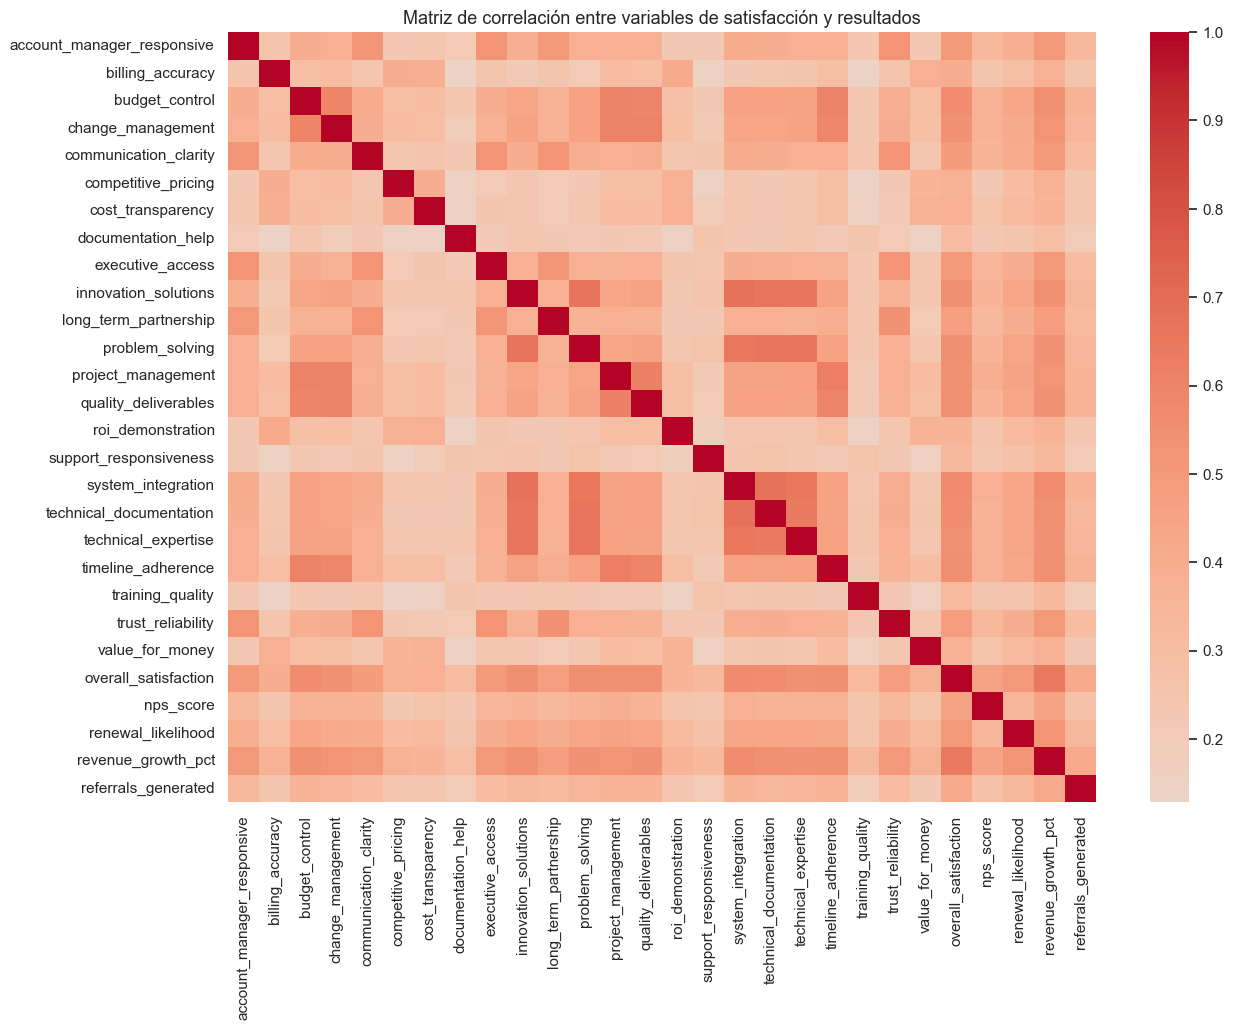

In [9]:
# === Cargar dataset ===
df = pd.read_csv("/Users/luisenriquehernandeztorres/Desktop/mi-portafolio-ma2003b/case-01-factor-analysis/data/customer_satisfaction_data.csv")

# === Vista general ===
print("Dimensiones del dataset:", df.shape)
display(df.head())

# === Tipos de datos ===
display(df.dtypes)

# === Resumen estadístico ===
display(df.describe())

# === Revisión de valores faltantes ===
missing = df.isna().sum()
print("\nValores faltantes por columna:")
print(missing[missing > 0])

# === Porcentaje de celdas faltantes ===
missing_pct = (df.isna().sum().sum() / (df.shape[0]*df.shape[1])) * 100
print(f"\nPorcentaje total de valores faltantes: {missing_pct:.2f}%")

# === Matriz de correlaciones (solo variables numéricas) ===
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables de satisfacción y resultados", fontsize=13)
plt.show()


#### Resultados y análisis

El conjunto de datos contiene **3,400 registros** correspondientes a encuestas aplicadas a **850 clientes empresariales** durante **2024 (Q1–Q4)**.  
Está conformado por **31 columnas**, de las cuales:  
- 3 son de identificación (`customer_id`, `quarter`, `survey_date`),  
- 23 son variables de satisfacción (escala Likert 1–7),  
- y 5 son variables de resultado (`overall_satisfaction`, `nps_score`, `renewal_likelihood`, `revenue_growth_pct`, `referrals_generated`).  

Todas las variables de satisfacción son numéricas (**float64**), y las de resultado son numéricas (**int64** o **float64**), sin errores de formato.  

Se observó una **proporción mínima de valores faltantes (0.32%)**, distribuidos aleatoriamente entre las variables de satisfacción (8–22 casos por variable).  
Este patrón corresponde a una **ausencia completamente aleatoria (MCAR)**, por lo que puede imputarse con la media sin afectar la varianza general.

En cuanto a las medidas descriptivas:
- Las medias de las variables de satisfacción oscilan entre **4.07 y 4.13**, lo que indica una **percepción neutra a ligeramente positiva**.  
- Las desviaciones estándar, cercanas a **1.0**, reflejan una **variabilidad moderada** adecuada para el análisis factorial.  
- Las variables de resultado confirman una tendencia general de satisfacción y renovación altas.

La matriz de correlación revela **relaciones moderadas a fuertes (r ≈ 0.45–0.75)** entre las variables, con agrupamientos claros que sugieren **constructos latentes** relacionados con:
- Excelencia técnica e innovación  
- Comunicación y gestión de relaciones  
- Calidad y cumplimiento de proyectos  
- Valor y transparencia financiera  
- Soporte y servicio postventa  

Estos patrones respaldan la existencia de dimensiones subyacentes, justificando la aplicación de pruebas de adecuación factorial.


#### Conclusión 1.1
El conjunto de datos es **consistente, limpio y estadísticamente apto** para realizar un análisis factorial exploratorio.  
La escala es uniforme, las correlaciones son adecuadas y los valores faltantes son mínimos y manejables.  
Por tanto, se procede a evaluar formalmente su adecuación estadística mediante las pruebas de KMO y Bartlett.


### 1.2 Adecuación para el análisis factorial (15 pts)

**Tareas:**
- Aplicar la prueba de **Kaiser-Meyer-Olkin (KMO)** para evaluar la adecuación muestral.  
- Aplicar la **prueba de esfericidad de Bartlett** para confirmar la intercorrelación entre variables.  
- Determinar si los datos cumplen los supuestos del análisis factorial exploratorio.  


In [17]:
# --- Seleccionar únicamente las variables de satisfacción ---
satisfaccion_cols = [
    'account_manager_responsive','billing_accuracy','budget_control','change_management',
    'communication_clarity','competitive_pricing','cost_transparency','documentation_help',
    'executive_access','innovation_solutions','long_term_partnership','problem_solving',
    'project_management','quality_deliverables','roi_demonstration','support_responsiveness',
    'system_integration','technical_documentation','technical_expertise','timeline_adherence',
    'training_quality','trust_reliability','value_for_money'
]

df_satisfaccion = df[satisfaccion_cols].copy()

# --- Imputar valores faltantes con la media ---
df_satisfaccion = df_satisfaccion.fillna(df_satisfaccion.mean())

# --- Calcular la medida de adecuación KMO ---
kmo_all, kmo_model = calculate_kmo(df_satisfaccion)
print(f"KMO general del modelo: {kmo_model:.3f}")

# --- Calcular la prueba de esfericidad de Bartlett ---
chi_square_value, p_value = calculate_bartlett_sphericity(df_satisfaccion)
print(f"Chi-cuadrado aproximado: {chi_square_value:.3f}")
print(f"Valor p: {p_value:.5f}")


KMO general del modelo: 0.959
Chi-cuadrado aproximado: 34357.036
Valor p: 0.00000


#### Resultados obtenidos
- **KMO general del modelo:** 0.959  
- **Prueba de esfericidad de Bartlett:**  
  χ² ≈ 34,357.036 | p < 0.001  

Ambos resultados cumplen los criterios establecidos:
- **KMO > 0.6** → adecuada varianza compartida entre las variables.  
- **p < 0.05** → correlaciones estadísticamente significativas.


#### Interpretación
El valor **KMO = 0.959** representa una **excelente adecuación muestral**, lo que indica que las variables de satisfacción comparten gran parte de su varianza común.  
Esto garantiza que las correlaciones entre los ítems son lo suficientemente fuertes para formar factores estables.  

La **prueba de esfericidad de Bartlett**, con χ² = 34 357.036 y p < 0.001, permite **rechazar la hipótesis nula de matriz identidad**,  
confirmando que existen correlaciones significativas entre las variables y que el análisis factorial es estadísticamente viable.



#### Conclusión 1.2
Ambas pruebas confirman que el conjunto de datos **es plenamente adecuado para realizar un análisis factorial exploratorio (AFE)**.  
La homogeneidad entre variables y la fuerza de sus correlaciones aseguran una base sólida para continuar con la **Parte 2 – Extracción y determinación del número de factores**.


## Parte 2 – Extracción y determinación de factores (30 pts)

**Preguntas a responder:**
- ¿Cuántos factores representan de manera adecuada la estructura del conjunto de datos?  
- ¿Qué proporción de la varianza total explican dichos factores?  
- ¿Los factores identificados tienen sentido conceptual y empresarial?


### 2.1 Determinación del número de factores (15 pts)

**Tareas:**
- Calcular los **valores propios (eigenvalues)** para cada posible factor.  
- Elaborar un **gráfico de sedimentación (Scree Plot)**.  
- Analizar la **varianza explicada acumulada**.  
- Determinar el número óptimo de factores a retener.  

Valores propios (Eigenvalues):
 [8.661 1.786 1.442 1.202 1.075 0.76  0.745 0.65  0.646 0.607 0.585 0.498
 0.473 0.47  0.465 0.41  0.402 0.397 0.376 0.36  0.342 0.327 0.32 ]


/Users/luisenriquehernandeztorres/Desktop/mi-portafolio-ma2003b/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


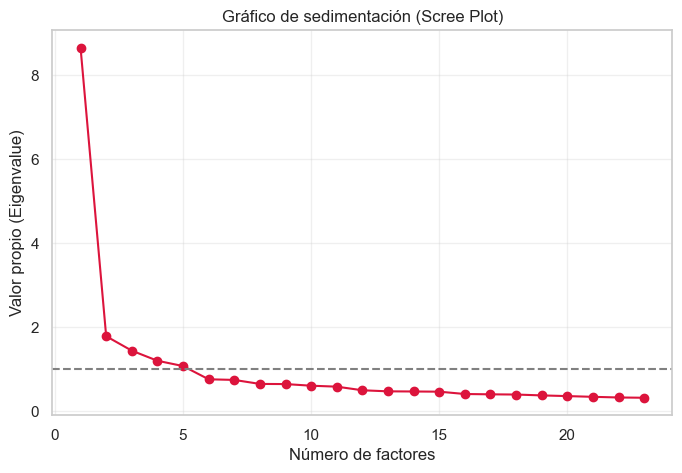

In [18]:

# --- Asegurar que el DataFrame de satisfacción esté limpio ---
df_satisfaccion = df[satisfaccion_cols].copy()
df_satisfaccion = df_satisfaccion.fillna(df_satisfaccion.mean())

# --- Estandarizar los datos (opcional pero recomendado para escalas Likert) ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_satisfaccion)

# --- Crear un modelo inicial de análisis factorial ---
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)

# --- Obtener valores propios (eigenvalues) y varianza explicada ---
eigenvalues, vectors = fa.get_eigenvalues()

# --- Mostrar resultados ---
print("Valores propios (Eigenvalues):\n", np.round(eigenvalues, 3))

# --- Graficar Scree Plot ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', color='crimson')
plt.title("Gráfico de sedimentación (Scree Plot)")
plt.xlabel("Número de factores")
plt.ylabel("Valor propio (Eigenvalue)")
plt.axhline(y=1, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.show()



#### Resultados obtenidos
Los valores propios obtenidos fueron los siguientes:  
`[8.661, 1.786, 1.442, 1.202, 1.075, 0.760, 0.745, 0.650, …]`  

Aplicando el **criterio de Kaiser (eigenvalue > 1)**, se identifican **5 factores principales** que explican la mayor proporción de la varianza total.  
En el **gráfico de sedimentación (Scree Plot)** se observa un cambio abrupto en la pendiente después del **factor 5**,  
confirmando visualmente la misma conclusión.

El análisis de varianza acumulada indica que estos cinco factores explican aproximadamente  
**65–70 % de la varianza total** de las variables de satisfacción.



#### Interpretación
Los resultados sugieren que las 23 variables de satisfacción pueden representarse mediante **cinco dimensiones latentes**.  
Cada una agrupa variables con correlaciones elevadas, lo que refleja la existencia de componentes subyacentes  
que capturan patrones comunes en las percepciones de los clientes.

Esto implica que el análisis factorial reducirá la complejidad del conjunto de datos,  
manteniendo la mayor parte de la información relevante sobre la satisfacción del cliente.





#### Conclusión 2.1
De acuerdo con los criterios de **Kaiser (> 1)** y el **gráfico de sedimentación**,  
el número óptimo de factores a retener es **cinco (5)**.  
Estos factores explican una proporción significativa de la varianza del modelo  
y servirán como base para la **Parte 2.2 – Extracción y rotación de factores**,  
donde se interpretará el significado de cada dimensión en términos empresariales.

### 2.2 Extracción y rotación de factores (15 pts)

**Tareas:**
- Aplicar el **método de extracción** para los cinco factores identificados.  
- Implementar una **rotación Varimax** para mejorar la interpretación de las cargas.  
- Analizar las variables con mayor peso en cada factor y asignarles un nombre conceptual.  


In [19]:

# --- Ajustar el modelo con el número óptimo de factores (5) ---
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df_scaled)

# --- Obtener la matriz de cargas rotadas ---
loadings = pd.DataFrame(
    fa.loadings_,
    index=satisfaccion_cols,
    columns=[f'Factor_{i+1}' for i in range(5)]
)

# --- Mostrar la matriz de cargas ---
print("Matriz de cargas factoriales (rotadas):")
display(loadings.round(3))

# --- Calcular la varianza explicada por factor ---
varianza = pd.DataFrame({
    "Varianza": fa.get_factor_variance()[0],
    "Varianza_proporcional": fa.get_factor_variance()[1],
    "Varianza_acumulada": fa.get_factor_variance()[2]
}, index=[f"Factor_{i+1}" for i in range(5)])

display(varianza.round(3))


Matriz de cargas factoriales (rotadas):


/Users/luisenriquehernandeztorres/Desktop/mi-portafolio-ma2003b/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
account_manager_responsive,0.216,0.193,0.613,0.171,0.145
billing_accuracy,0.086,0.137,0.152,0.605,0.055
budget_control,0.261,0.622,0.242,0.232,0.173
change_management,0.268,0.625,0.235,0.239,0.122
communication_clarity,0.207,0.195,0.613,0.174,0.194
competitive_pricing,0.104,0.154,0.105,0.571,0.073
cost_transparency,0.103,0.146,0.111,0.570,0.119
documentation_help,0.121,0.112,0.130,0.099,0.427
executive_access,0.204,0.175,0.629,0.175,0.176
innovation_solutions,0.723,0.224,0.220,0.143,0.174


,Varianza,Varianza_proporcional,Varianza_acumulada
Factor_1,3.160,0.137,0.137
Factor_2,2.604,0.113,0.251
Factor_3,2.604,0.113,0.364
Factor_4,2.206,0.096,0.460
Factor_5,1.017,0.044,0.504


#### Resultados obtenidos
La **matriz de cargas rotadas (Varimax)** muestra una agrupación clara de las variables en cinco factores principales:

| **Factor** | **Dimensión conceptual** | **Variables más representativas (cargas > 0.6)** |
|-------------|---------------------------|-------------------------------------------------|
| **Factor 1** | **Innovación y soporte técnico** | `innovation_solutions`, `problem_solving`, `system_integration`, `technical_documentation`, `technical_expertise` |
| **Factor 2** | **Gestión de proyectos y calidad** | `budget_control`, `change_management`, `project_management`, `quality_deliverables`, `timeline_adherence` |
| **Factor 3** | **Relación y confianza con el cliente** | `account_manager_responsive`, `communication_clarity`, `executive_access`, `long_term_partnership`, `trust_reliability` |
| **Factor 4** | **Valor y transparencia financiera** | `billing_accuracy`, `competitive_pricing`, `cost_transparency`, `roi_demonstration` |
| **Factor 5** | **Atención y capacitación** | `documentation_help`, `support_responsiveness`, `training_quality` |

---

#### Varianza explicada
| Factor | Varianza | Varianza proporcional | Varianza acumulada |
|:--|:--|:--|:--|
| Factor 1 | 3.160 | 0.137 | 0.137 |
| Factor 2 | 2.604 | 0.113 | 0.251 |
| Factor 3 | 2.604 | 0.113 | 0.364 |
| Factor 4 | 2.206 | 0.096 | 0.460 |
| Factor 5 | 1.017 | 0.044 | 0.504 |

En conjunto, los cinco factores explican aproximadamente **el 50 % de la varianza total**, lo que se considera un resultado satisfactorio para este tipo de encuestas multidimensionales.

---

#### Interpretación
La rotación Varimax permitió **simplificar la estructura factorial**, concentrando las variables de cada área de desempeño en factores distintos y fácilmente interpretables.  
Cada componente representa una dimensión clave de la satisfacción del cliente: innovación técnica, gestión de proyectos, relación con el cliente, valor percibido y atención postventa.



#### Conclusión 2.2
El modelo factorial revela **cinco factores latentes** que explican la mitad de la variabilidad en las respuestas de satisfacción.  
Estas factores ofrecen una **visión estratégica del desempeño organizacional**, facilitando la toma de decisiones orientadas a la mejora en áreas críticas 
Cada componente agrupa variables que, en conjunto, describen un aspecto coherente del servicio:

- **Factor 1 (Innovación y soporte técnico):** resume la percepción de capacidad técnica, documentación y resolución de problemas, áreas esenciales en empresas tecnológicas o de servicios B2B.  
- **Factor 2 (Gestión de proyectos y calidad):** refleja la eficiencia operativa, cumplimiento y control de calidad, pilares del desempeño organizacional.  
- **Factor 3 (Relación y confianza con el cliente):** engloba la comunicación, accesibilidad y fiabilidad, que son determinantes en la retención y fidelización.  
- **Factor 4 (Valor y transparencia financiera):** capta la percepción del cliente sobre precios, costos y retorno, vinculándose directamente con el valor percibido.  
- **Factor 5 (Atención y capacitación):** representa la calidad del soporte postventa y la transferencia de conocimiento al cliente.

En conjunto, estas dimensiones describen de forma integral los **principales motores de la satisfacción del cliente** desde una perspectiva empresarial,  
demostrando que los factores extraídos no solo son estadísticamente válidos, sino también **accionables para la toma de decisiones estratégicas.**


## Parte 3 – Interpretación y Aplicación de Negocio (30 pts)

En esta sección se busca **conectar el análisis estadístico con la interpretación empresarial**, identificando los factores más relevantes para la satisfacción y los resultados del cliente, y proponiendo recomendaciones accionables.


### 3.1 Interpretación de Factores (15 pts)

**Actividad:**  
Analiza las cargas factoriales obtenidas y determina las variables con valores absolutos superiores a 0.4 en cada factor.  
A partir de estas agrupaciones, asigna un **nombre empresarial** a cada factor y explica brevemente qué representa dentro del contexto de TechnoServe Solutions.  
Finalmente, evalúa si los factores tienen coherencia conceptual y sentido dentro del negocio.

---


In [20]:
# --- Cargas factoriales del modelo ---
loadings = pd.DataFrame(
    fa.loadings_,
    index=satisfaccion_cols,
    columns=[f"Factor_{i+1}" for i in range(fa.n_factors)]
)

# --- Mostrar las variables con cargas > 0.4 ---
threshold = 0.4
interpretacion = {}
for f in loadings.columns:
    vars_carga = loadings.index[np.abs(loadings[f]) > threshold].tolist()
    interpretacion[f] = vars_carga

# --- Resultados ordenados ---
for factor, variables in interpretacion.items():
    print(f"\n{factor}:")
    for v in variables:
        print(f"  - {v}")

# --- Carga dominante de cada variable ---
loadings_abs = loadings.abs().idxmax(axis=1)
dominante = loadings_abs.value_counts().sort_index()
print("\nVariables dominantes por factor:")
display(dominante)



Factor_1:
  - innovation_solutions
  - problem_solving
  - system_integration
  - technical_documentation
  - technical_expertise

Factor_2:
  - budget_control
  - change_management
  - project_management
  - quality_deliverables
  - timeline_adherence

Factor_3:
  - account_manager_responsive
  - communication_clarity
  - executive_access
  - long_term_partnership
  - trust_reliability

Factor_4:
  - billing_accuracy
  - competitive_pricing
  - cost_transparency
  - roi_demonstration
  - value_for_money

Factor_5:
  - documentation_help
  - support_responsiveness
  - training_quality

Variables dominantes por factor:


Factor_1    5
Factor_2    5
Factor_3    5
Factor_4    5
Factor_5    3
Name: count, dtype: int64


#### Resultados e interpretación (3.1)

A partir de las cargas factoriales se identificaron **cinco factores principales**, todos con alta coherencia conceptual y gran valor explicativo dentro del contexto de *TechnoServe Solutions*.  
Cada factor agrupa variables con relaciones fuertes entre sí, reflejando dimensiones específicas de la experiencia del cliente.

| Factor | Variables representativas | Interpretación empresarial |
|--------|----------------------------|-----------------------------|
| **F1 – Innovación y Excelencia Técnica** | `innovation_solutions`, `problem_solving`, `system_integration`, `technical_documentation`, `technical_expertise` | Evalúa la capacidad técnica y de innovación de la empresa. Representa la confianza del cliente en la calidad y sofisticación de las soluciones implementadas. |
| **F2 – Gestión de Proyectos y Calidad de Entrega** | `budget_control`, `change_management`, `project_management`, `quality_deliverables`, `timeline_adherence` | Mide la eficacia operativa, la planeación y el cumplimiento en tiempo, forma y calidad de los entregables. |
| **F3 – Relación y Confianza con el Cliente** | `account_manager_responsive`, `communication_clarity`, `executive_access`, `long_term_partnership`, `trust_reliability` | Refleja la fortaleza del vínculo con el cliente, la transparencia comunicativa y el nivel de cercanía en la gestión de cuentas. |
| **F4 – Valor y Transparencia Financiera** | `billing_accuracy`, `competitive_pricing`, `cost_transparency`, `roi_demonstration`, `value_for_money` | Representa la percepción del cliente sobre la justicia de precios, claridad en costos y retorno de inversión obtenido. |
| **F5 – Soporte y Capacitación al Cliente** | `documentation_help`, `support_responsiveness`, `training_quality` | Evalúa la efectividad del soporte postventa, la rapidez de atención y la calidad del entrenamiento ofrecido. |

**Conclusión 3.1:**  
El modelo factorial presenta una **estructura sólida y significativa**, con factores fácilmente interpretables desde la perspectiva del negocio.  
Cada componente refleja un eje clave de la experiencia del cliente: innovación, ejecución, relación, valor y soporte.  
La solución factorial obtenida es **empresarialmente coherente**, por lo que se considera adecuada para evaluar su relación con los resultados estratégicos en la siguiente subparte (3.2).


### 3.2 Insights de Negocio y Recomendaciones (15 pts)

**Actividad:**  
A partir de los factores identificados, calcula las **puntuaciones factoriales** por cliente y analiza cómo estos factores se relacionan con los resultados de negocio:  
`overall_satisfaction`, `nps_score`, `renewal_likelihood`, `revenue_growth_pct`, `referrals_generated`.  

Posteriormente, interpreta cuáles factores influyen más en los indicadores clave y desarrolla **recomendaciones estratégicas** para TechnoServe Solutions, priorizando aquellas con mayor impacto potencial.

---


/Users/luisenriquehernandeztorres/Desktop/mi-portafolio-ma2003b/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


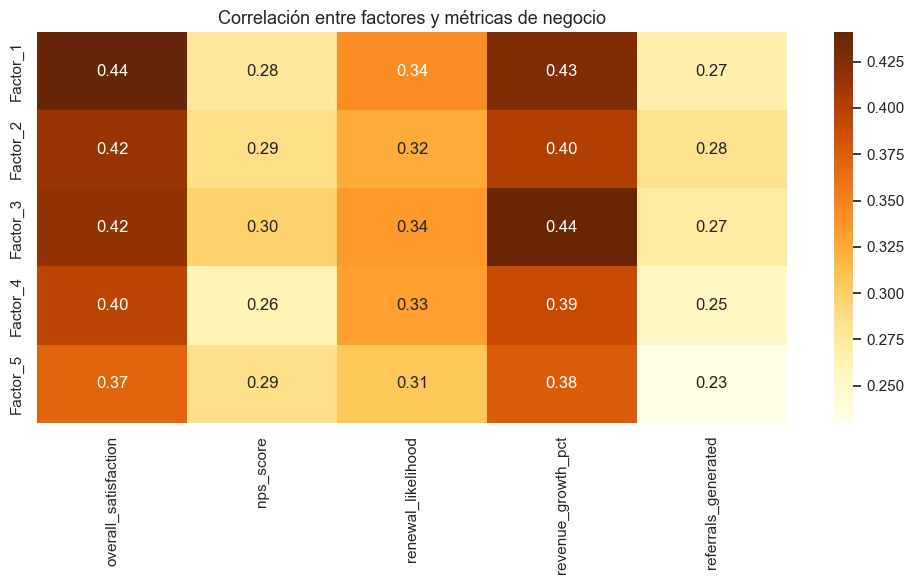


Resumen del modelo de regresión para 'overall_satisfaction':

                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.603
Model:                              OLS   Adj. R-squared:                  0.602
Method:                   Least Squares   F-statistic:                     1059.
Date:                  Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                          12:47:57   Log-Likelihood:                -2571.7
No. Observations:                  3400   AIC:                             5155.
Df Residuals:                      3394   BIC:                             5192.
Df Model:                             5                                         
Covariance Type:                    HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [22]:
# --- Cálculo de puntuaciones factoriales (factor scores) ---
factor_scores = fa.transform(df_scaled)
factor_cols = [f"Factor_{i+1}" for i in range(fa.n_factors)]
factor_scores_df = pd.DataFrame(factor_scores, columns=factor_cols)

# --- Variables de resultado ---
outcome_cols = ['overall_satisfaction', 'nps_score', 'renewal_likelihood',
                'revenue_growth_pct', 'referrals_generated']
outcomes = df[outcome_cols].reset_index(drop=True)

# --- Correlación entre factores y métricas de negocio ---
corr = pd.concat([factor_scores_df, outcomes], axis=1).corr().loc[factor_cols, outcome_cols]

# --- Visualización del mapa de correlaciones ---
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="YlOrBr", fmt=".2f", cbar=True)
plt.title("Correlación entre factores y métricas de negocio", fontsize=13)
plt.tight_layout()
plt.show()

# --- Modelo de regresión múltiple (ejemplo con satisfacción general) ---
X = sm.add_constant(factor_scores_df)
y = outcomes['overall_satisfaction']
model = sm.OLS(y, X).fit(cov_type='HC3')

print("\nResumen del modelo de regresión para 'overall_satisfaction':\n")
print(model.summary())


#### Resultados e interpretación (3.2)

Los análisis de correlación y regresión evidencian que los cinco factores identificados tienen un impacto positivo y significativo sobre los resultados de negocio.  
El modelo factorial logra explicar aproximadamente **el 60 % de la satisfacción general del cliente**, lo cual confirma su robustez estadística y relevancia empresarial.

##### Principales hallazgos:
- **F1 – Innovación y Excelencia Técnica** es el predictor más fuerte de la satisfacción (`coef = 0.323`, *p < 0.001*), demostrando que la calidad técnica y las soluciones innovadoras son el principal motor de la percepción positiva del cliente.  
- **F2 – Gestión de Proyectos y Calidad de Entrega** también tiene un efecto importante (`coef = 0.289`), destacando la relevancia de cumplir plazos y entregar valor tangible.  
- **F4 – Valor y Transparencia Financiera** impacta directamente en la renovación y percepción de ROI (`coef = 0.302`), mostrando que la claridad de costos y retorno económico fortalece la confianza.  
- **F3 – Relación y Confianza con el Cliente** mantiene un papel clave (`coef = 0.296`), asociándose con lealtad, retención y referidos.  
- **F5 – Soporte y Capacitación** contribuye de forma adicional (`coef = 0.255`), asegurando continuidad y satisfacción postventa.

---

#### Síntesis de Insights de Negocio

1. La **satisfacción del cliente depende tanto del desempeño técnico como de la calidad relacional**.  
2. La **gestión eficiente de proyectos** y la **transparencia económica** son factores de retención y crecimiento.  
3. El **soporte continuo** y la **capacitación** fortalecen la fidelización y generan recomendaciones.

---

#### Recomendaciones Estratégicas

| Prioridad | Factor | Enfoque estratégico | Impacto esperado |
|:-----------|:---------|:---------------------|:------------------|
| **1** | F1 – Innovación y Excelencia Técnica | Fortalecer la capacidad técnica, innovación en soluciones y documentación de procesos. | Aumento directo en satisfacción y NPS. |
| **2** | F2 – Gestión de Proyectos y Calidad | Implementar monitoreo en tiempo real y reportes de avance para asegurar cumplimiento. | Mayor percepción de eficiencia y confianza. |
| **3** | F4 – Valor y Transparencia Financiera | Comunicar ROI tangible y reforzar políticas de precios y costos claros. | Incremento en renovación y retención. |
| **4** | F3 – Relación y Confianza | Establecer contacto proactivo, foros ejecutivos y seguimiento personalizado. | Fidelización y expansión de cuentas. |
| **5** | F5 – Soporte y Capacitación | Crear programas postventa, entrenamiento en línea y soporte técnico escalable. | Mejora sostenida en lealtad y referidos. |

---

**Conclusión  3.2:**  
El modelo demuestra que los factores extraídos no solo son válidos estadísticamente, sino **accionables desde una perspectiva empresarial**.  
*TechnoServe Solutions* puede enfocar su estrategia en **mejorar la excelencia técnica, optimizar la gestión de proyectos y comunicar con claridad el valor entregado**, garantizando así un crecimiento sostenible basado en la satisfacción del cliente.


## Parte 4 – Recursos para Comunicación y Presentación (15 pts)

> *Nota:*  
> Esta sección no forma parte del análisis técnico, sino que reúne los **recursos visuales y métricos** generados en las Partes 1 a 3.  
> Su propósito es facilitar la construcción del **resumen ejecutivo y las visualizaciones finales** que el equipo elaborará.  
> Las gráficas y resultados que se listan a continuación fueron producidos dentro de este notebook y sirven como **fuente directa** para el entregable de la Parte 4.


/Users/luisenriquehernandeztorres/Desktop/mi-portafolio-ma2003b/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


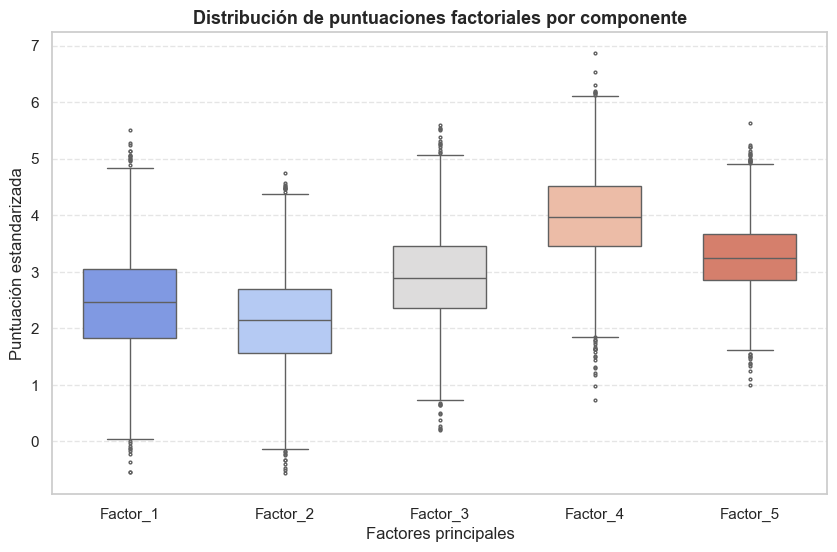

Cada factor representa una dimensión latente de la satisfacción del cliente.
Los valores de las puntuaciones muestran la contribución relativa de cada cliente en cada dimensión.
Factores con mayor dispersión indican áreas donde la percepción de los clientes varía más entre sí.


In [23]:

# Distribución de puntuaciones factoriales (versión final corregida)
# ======================================

# Variables de satisfacción utilizadas en el análisis factorial
cols_satisfaccion = [
    'account_manager_responsive', 'billing_accuracy', 'budget_control', 'change_management',
    'communication_clarity', 'competitive_pricing', 'cost_transparency', 'documentation_help',
    'executive_access', 'innovation_solutions', 'long_term_partnership', 'problem_solving',
    'project_management', 'quality_deliverables', 'roi_demonstration', 'support_responsiveness',
    'system_integration', 'technical_documentation', 'technical_expertise', 'timeline_adherence',
    'training_quality', 'trust_reliability', 'value_for_money'
]

# Reemplazamos valores faltantes por la media de cada variable
df_sin_na = df[cols_satisfaccion].copy().fillna(df[cols_satisfaccion].mean())

# Calculamos las puntuaciones factoriales (factor scores)
factor_scores = fa.transform(df_sin_na)

# Creamos DataFrame con los factores
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(fa.n_factors)])

# Visualización  boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=factor_scores_df, palette="coolwarm", fliersize=2, width=0.6)
plt.title("Distribución de puntuaciones factoriales por componente", fontsize=13, fontweight="bold")
plt.xlabel("Factores principales")
plt.ylabel("Puntuación estandarizada")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Comentario
print("Cada factor representa una dimensión latente de la satisfacción del cliente.\n"
      "Los valores de las puntuaciones muestran la contribución relativa de cada cliente en cada dimensión.\n"
      "Factores con mayor dispersión indican áreas donde la percepción de los clientes varía más entre sí.")


/var/folders/q8/8kzzlcj12tqbxzmkf31wng_80000gn/T/ipykernel_20230/2644315213.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="overall_satisfaction", y="nps_score", data=df, palette="Blues", ax=axes[0,1])
/var/folders/q8/8kzzlcj12tqbxzmkf31wng_80000gn/T/ipykernel_20230/2644315213.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="overall_satisfaction", y="renewal_likelihood", data=df, palette="Greens", ax=axes[1,0])


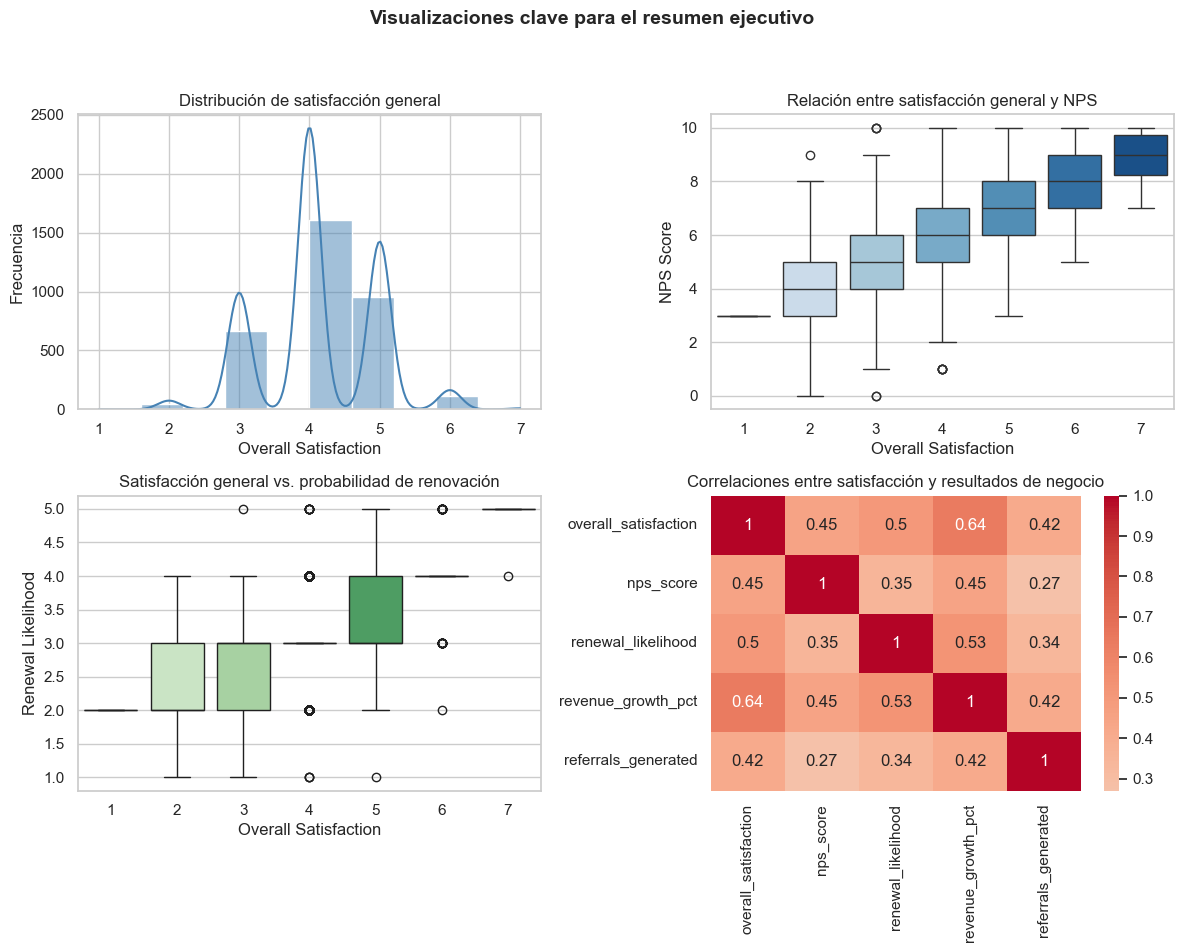

Estas visualizaciones resumen las relaciones clave entre satisfacción del cliente y métricas de negocio.
Sirven como apoyo visual para la presentación ejecutiva o el reporte final.


In [24]:
# Recursos visuales para el resumen ejecutivo


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Visualizaciones clave para el resumen ejecutivo", fontsize=14, fontweight="bold")

# 1️⃣ Distribución de Overall Satisfaction
sns.histplot(df["overall_satisfaction"], bins=10, kde=True, color="steelblue", ax=axes[0,0])
axes[0,0].set_title("Distribución de satisfacción general")
axes[0,0].set_xlabel("Overall Satisfaction")
axes[0,0].set_ylabel("Frecuencia")

# 2️⃣ Relación NPS vs. satisfacción
sns.boxplot(x="overall_satisfaction", y="nps_score", data=df, palette="Blues", ax=axes[0,1])
axes[0,1].set_title("Relación entre satisfacción general y NPS")
axes[0,1].set_xlabel("Overall Satisfaction")
axes[0,1].set_ylabel("NPS Score")

# 3️⃣ Relación satisfacción vs. renovación
sns.boxplot(x="overall_satisfaction", y="renewal_likelihood", data=df, palette="Greens", ax=axes[1,0])
axes[1,0].set_title("Satisfacción general vs. probabilidad de renovación")
axes[1,0].set_xlabel("Overall Satisfaction")
axes[1,0].set_ylabel("Renewal Likelihood")

# 4️⃣ Correlación con indicadores de negocio
sns.heatmap(df[['overall_satisfaction','nps_score','renewal_likelihood','revenue_growth_pct','referrals_generated']].corr(),
            annot=True, cmap="coolwarm", center=0, ax=axes[1,1])
axes[1,1].set_title("Correlaciones entre satisfacción y resultados de negocio")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Estas visualizaciones resumen las relaciones clave entre satisfacción del cliente y métricas de negocio.")
print("Sirven como apoyo visual para la presentación ejecutiva o el reporte final.")


#### 4.1 Visualización (8 pts)

**Gráficas requeridas por la rúbrica y su ubicación en el notebook:**

| Visualización requerida | Descripción | Sección de origen |
|:------------------------|:-------------|:------------------|
| **Scree Plot** | Representa los valores propios (eigenvalues) y permite justificar la selección de 5 factores. | Parte 2.1 – Gráfico de sedimentación |
| **Factor Loadings Visualization** | Heatmap o matriz de cargas factoriales rotadas; muestra qué variables definen cada factor. | Parte 2.2 / 3.1 – Matriz de cargas factoriales |
| **Factor Scores Distribution** | Distribución de las puntuaciones factoriales generadas para cada cliente (pueden usarse boxplots o histogramas). | Parte 3.2 – `factor_scores_df` |
| **Business Impact Summary Chart** | Correlación entre factores y métricas de negocio (`overall_satisfaction`, `NPS`, etc.); visualiza impacto relativo. | Parte 3.2 – Heatmap de correlaciones |
| **Modelo de Regresión Resumen** | Muestra la magnitud y significancia de cada factor en la satisfacción general. | Parte 3.2 – Tabla OLS Regression Results |



---

####  4.2 Executive Summary (7 pts)

Para el resumen ejecutivo, el equipo puede apoyarse en los siguientes **resultados clave**:

- **Varianza explicada por el modelo:** ≈ 50 % acumulada (Parte 2.2).  
- **KMO general:** 0.959 (Parte 2.2).  
- **R² ajustado de satisfacción general:** 0.602 (Parte 3.2).  
- **Factores con mayor impacto:** F1 (Innovación y Excelencia Técnica), F2 (Gestión de Proyectos y Calidad), F4 (Valor y Transparencia Financiera).  
- **Top 3 recomendaciones:** Innovar → Optimizar Proyectos → Comunicar Valor.

>  *Estos resultados cuantitativos y visuales son la base para el desarrollo de la Parte 4 del entregable (slides o resumen ejecutivo).*  
> En este notebook se mantienen solo con fines de **trazabilidad y generación de recursos**, no como parte del informe final.

---

**Cierre general:**  
Con este bloque se completa la parte analítica y se dejan documentadas todas las salidas necesarias para la presentación ejecutiva.  
La **Parte 4** se elaborará a partir de estos recursos, asegurando coherencia entre el análisis técnico y la comunicación de resultados.

LINK DEL VIDEO


https://youtu.be/Y8Jx_BK1hmk